In [1]:
# Libraries
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from waveome import (
    model_classes,
    kernels,
    model_search,
    likelihoods
)

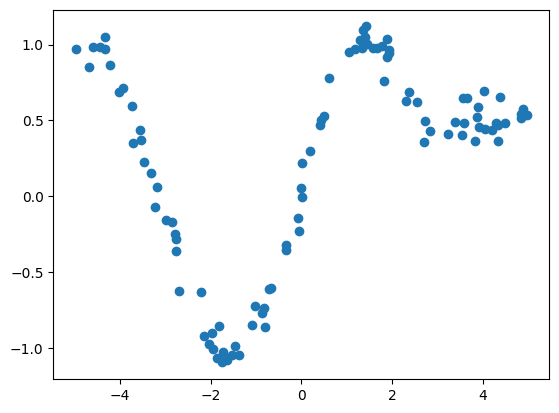

In [2]:
# Simulate some data
np.random.seed(9102)
N = 100
# X = np.concatenate(
#     [
#         np.random.choice(a=np.arange(3), size=(N, 1), replace=True),
#         np.random.uniform(low=-5, high=5, size=(N, 1))
#     ],
#     axis=1
# )
X = np.random.uniform(low=-5, high=5, size=(N, 1))

# Prediction points for later
num_pred_points = 1000
xnew = np.linspace(-5, 5, num_pred_points).reshape(-1, 1)

# Outcome is sin with unit specific offset
# Y = (np.sin(X[:, 1] + X[:, 0]) + X[:, 0] + np.random.normal(scale=.1, size=N)).reshape(-1, 1)
Y = np.sin(X)
Y[X >= 3] = 0.5
Y += np.random.normal(scale=.1, size=(N, 1))

# Plot the functions for each unit
# for unit in np.unique(X[:, 0]):
#     plt.scatter(X[X[:, 0] == unit, 1], Y[X[:, 0] == unit], label=f'Unit {int(unit)}')
# plt.legend()
plt.scatter(X, Y)
plt.show()

In [3]:
# Make base class
gp = model_classes.BaseGP(
    X=X,
    Y=Y,
    # kernel=(
    #     kernels.Categorical(active_dims=[0])
    #     * gpflow.kernels.SquaredExponential(active_dims=[1])
    #     + gpflow.kernels.SquaredExponential(active_dims=[1])
    # ),
    kernel=gpflow.kernels.SquaredExponential(),
    verbose=True
)
print(gpflow.utilities.print_summary(gp))

╒════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═══════════════╤═════════╤══════════════════╕
│ name                       │ class     │ transform        │ prior   │ trainable   │ shape         │ dtype   │ value            │
╞════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═══════════════╪═════════╪══════════════════╡
│ BaseGP.mean_function.c     │ Parameter │ Identity         │         │ True        │ (1,)          │ float64 │ [0.]             │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ BaseGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()            │ float64 │ 1.0              │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ BaseGP.kernel.lengthscales │ Parameter │ Softplus         │         │ True       

In [4]:
# Randomize initial values and then optimize hyperparameters
gp.randomize_params(random_seed=9102)
gp.optimize_params()
gp

Round 0 training loss: 545.505874544965
Round 100 training loss: 254.5954010064654
Round 200 training loss: 235.86440536539135
Round 300 training loss: 224.14664373777174
Round 400 training loss: 213.69209295266734
Round 500 training loss: 203.3473232766284
Round 600 training loss: 192.8492911179286
Round 700 training loss: 182.19194868514646
Round 800 training loss: 171.61336273282208
Round 900 training loss: 161.3314989096428
Round 1000 training loss: 151.47810910156556
Round 1100 training loss: 142.11271751670841
Round 1200 training loss: 133.25163790458882
Round 1300 training loss: 124.89008367864156
Round 1400 training loss: 117.01415244467356
Round 1500 training loss: 109.60597993981256
Round 1600 training loss: 102.64554134104932
Round 1700 training loss: 96.11122397485416
Round 1800 training loss: 89.9801488896793
Round 1900 training loss: 84.22856160573346
Optimization converged - stopping early (round 1980)


name,class,transform,prior,trainable,shape,dtype,value
BaseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.45238]
BaseGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.12669
BaseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.37855
BaseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.04965
BaseGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
BaseGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[7.93360e-01...
BaseGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[5.69210e-01, 0.00000e+00, 0.00000e+00..."


In [5]:
# Show that we can do this process a number of times to search parameter space easier
gp.random_restart_optimize(num_restart=3)

Random restart 1
Round 0 training loss: 935.7529633656535
Round 100 training loss: 135.75849496237237
Round 200 training loss: 75.15449887888633
Round 300 training loss: 70.3286428120166
Round 400 training loss: 65.807163090659
Round 500 training loss: 61.54631794891341
Round 600 training loss: 57.529055722572195
Round 700 training loss: 53.73863206369818
Round 800 training loss: 50.15908309184984
Round 900 training loss: 46.77549160624998
Round 1000 training loss: 43.57408381390328
Round 1100 training loss: 40.54223306626044
Round 1200 training loss: 37.668411048369194
Round 1300 training loss: 34.94211026978567
Round 1400 training loss: 32.35375287172317
Round 1500 training loss: 29.89459544928166
Round 1600 training loss: 27.55663610787542
Round 1700 training loss: 25.332527585697846
Round 1800 training loss: 23.215498586725616
Round 1900 training loss: 21.199284284985815
Round 2000 training loss: 19.278066134492754
Round 2100 training loss: 17.446420569136436
Round 2200 training lo

Optimization converged - stopping early (round 2415)
Found better parameters!
Random restart 2
Round 0 training loss: 547.7930644757341
Round 100 training loss: 83.70383105994193


Optimization converged - stopping early (round 150)
Found better parameters!
Random restart 3
Round 0 training loss: 252.97727617937602
Optimization converged - stopping early (round 65)


In [6]:
gp

name,class,transform,prior,trainable,shape,dtype,value
BaseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.43415]
BaseGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.13337
BaseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.33723
BaseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.01508
BaseGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
BaseGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[9.05500e-01...
BaseGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[2.36860e-01, 0.00000e+00, 0.00000e+00..."


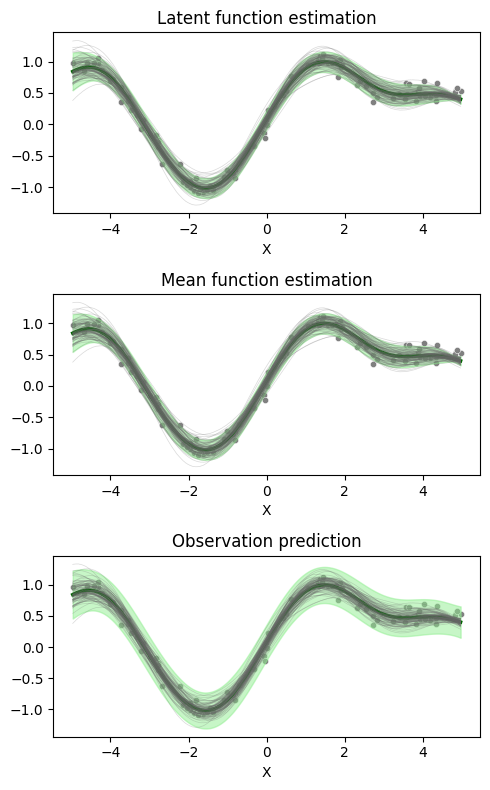

In [7]:
# Now plot the resulting model predictions
figs, axs = plt.subplots(3, 1, figsize=(5, 8))
# for i in range(3):
#     gp.plot_functions(x_idx=1, col_names=['X'], predict_type='func', ax=axs[0], unit_idx=0, unit_label=i, plot_points=False)
#     gp.plot_functions(x_idx=1, col_names=['X'], predict_type='mean', ax=axs[1], unit_idx=0, unit_label=i, plot_points=False)
#     gp.plot_functions(x_idx=1, col_names=['X'], predict_type='obs', ax=axs[2], unit_idx=0, unit_label=i, plot_points=False)
gp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
gp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
gp.plot_functions(x_idx=0, col_names=['X'], predict_type='obs', ax=axs[2])
axs[2].set_title('Observation prediction')
figs.tight_layout()
plt.show()

In [8]:
gp.kernel_name

'squared_exponential'

In [9]:
print(f"Variance explained for each component: {gp.variance_explained()}")
print(f"BIC: {gp.calc_metric()}")

Variance explained for each component: None
BIC: 31.587819994932573


## Nonnormal data

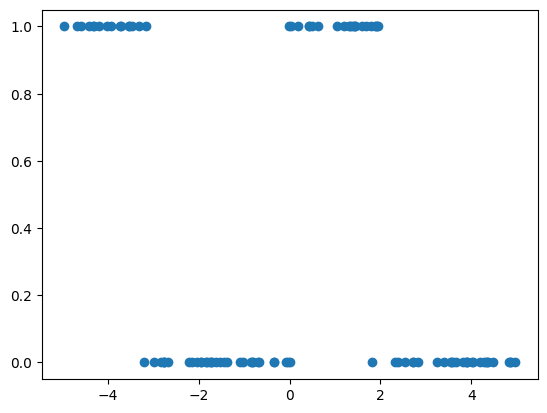

In [10]:
np.random.seed(9102)
import scipy
Y_binomial = np.random.binomial(n=1, p=scipy.special.expit(Y))
# for unit in np.unique(X[:, 0]):
    # plt.scatter(X[X[:, 0] == unit, 1], Y_binomial[X[:, 0] == unit], label=f'Unit {int(unit)}')
plt.scatter(X, Y_binomial)
# plt.legend()
plt.show()

In [11]:
logistic_gp = model_classes.VarGP(
    X=X,
    Y=Y_binomial,
    kernel=gpflow.kernels.SquaredExponential(),
    likelihood='bernoulli'
)

In [12]:
logistic_gp.optimize_params()
logistic_gp

name,class,transform,prior,trainable,shape,dtype,value
VarGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.30718]
VarGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.01209
VarGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.94982
VarGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
VarGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[4.952e-02...
VarGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[9.9222e-01, 0.0000e+00, 0.0000e+00..."


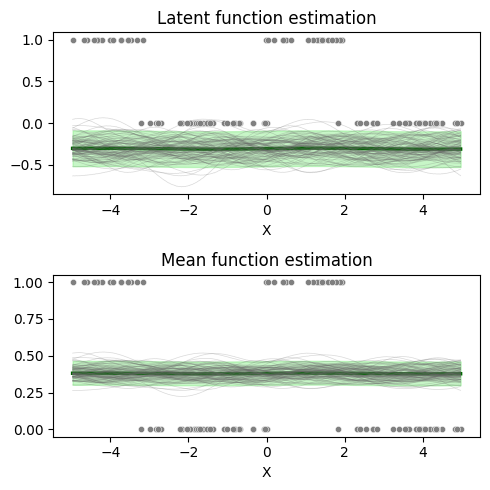

In [13]:
# Now plot the resulting model predictions
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
logistic_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')

logistic_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')

# This throws an error 
# logistic_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='obs', ax=axs[2])
# axs[2].set_title('Observation prediction')

figs.tight_layout()
plt.show()

# figs, axs = plt.subplots(3, 1, figsize=(5, 5))
# for i in range(3):
#     logistic_gp.plot_functions(x_idx=1, col_names=['X'], predict_type='func', ax=axs[0], unit_idx=0, unit_label=i, plot_points=False)
#     logistic_gp.plot_functions(x_idx=1, col_names=['X'], predict_type='mean', ax=axs[1], unit_idx=0, unit_label=i, plot_points=False)
#     logistic_gp.plot_functions(x_idx=1, col_names=['X'], predict_type='obs', ax=axs[2], unit_idx=0, unit_label=i, plot_points=False)
# plt.show()

## Zero Inflated Negative Binomial

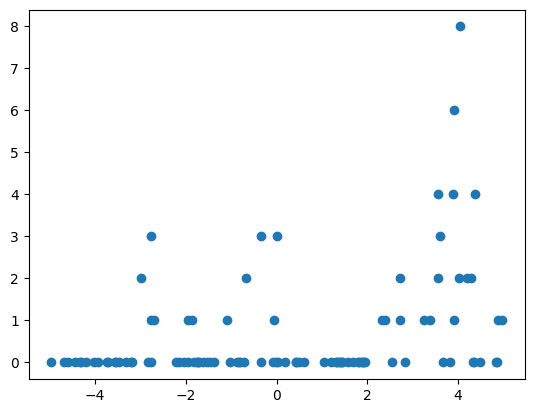

In [14]:

zinb = likelihoods.ZeroInflatedNegativeBinomial()

def zinb_sample(zinb, X, Y):
    m = zinb.invlink(Y) #* zinb.scale
    r = 1. / zinb.alpha
    np.random.seed(9102)
    obs_flag = np.random.binomial(n=1, p=(1.0 - (m/ (zinb.km + m))))
    intensity_val = np.random.negative_binomial(
        n=r, 
        p=(r / (m + r))
    )
    return obs_flag * intensity_val

# Y_zinb = zinb._conditional_mean(X, Y).numpy()
# Y_zinb = likelihoods.ZeroInflatedNegativeBinomial().invlink(Y).numpy()
Y_zinb = zinb_sample(zinb, X, Y).astype(float)
plt.scatter(X, Y_zinb)

In [15]:
zinb_gp = model_classes.VarGP(
    X=X,
    Y=Y_zinb,
    kernel=gpflow.kernels.SquaredExponential(),
    likelihood='zeroinflated_negativebinomial'
)
zinb_gp.optimize_params()

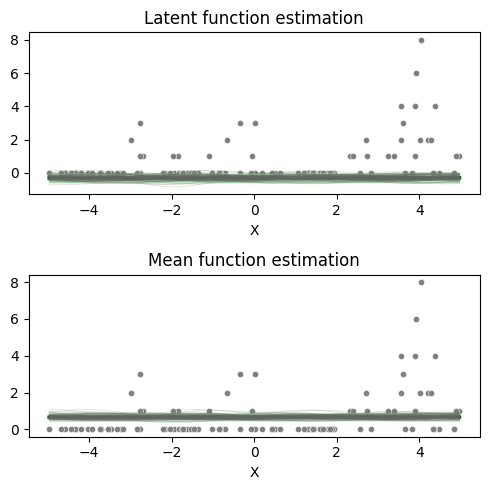

In [16]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
zinb_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
zinb_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

## Inducing points

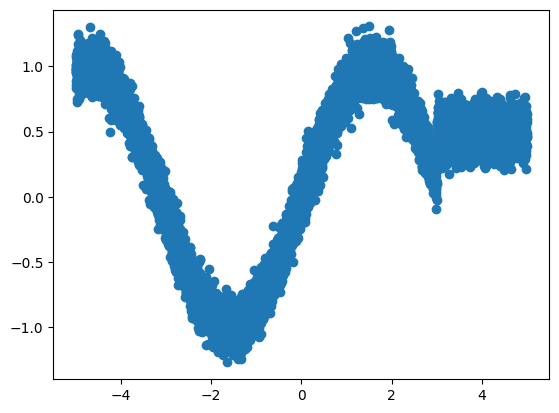

In [17]:
# Simulate some data
np.random.seed(9102)
X_big = np.random.uniform(low=-5, high=5, size=(100*N, 1))
Y_big = np.sin(X_big)
Y_big[X_big >= 3] = 0.5
Y_big += np.random.normal(scale=.1, size=(100*N, 1))
plt.scatter(X_big, Y_big)

In [18]:
sgp = model_classes.SparseGP(
    X=X_big,
    Y=Y_big,
    kernel=gpflow.kernels.SquaredExponential(),
    num_inducing_points=10,
    random_seed=9102
)
sgp

name,class,transform,prior,trainable,shape,dtype,value
SparseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.43415]
SparseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
SparseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
SparseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SparseGP.inducing_variable.Z,Parameter,Identity,,True,"(10, 1)",float64,[[-2.57471...
SparseGP.q_mu,Parameter,Identity,,True,"(10, 1)",float64,[[0....
SparseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 10, 10)",float64,"[[[1., 0., 0...."


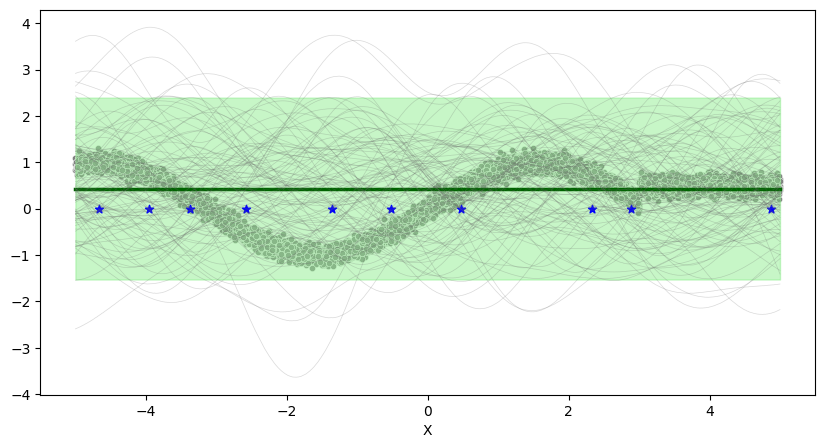

In [19]:
# Plot original points with inducing points
sgp.plot_functions(x_idx=0, col_names=['X'])
plt.scatter(
    sgp.inducing_variable.Z, 
    np.zeros_like(sgp.inducing_variable.Z), 
    color='blue', 
    marker='*'
)

In [20]:
sgp

name,class,transform,prior,trainable,shape,dtype,value
SparseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.43415]
SparseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
SparseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
SparseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SparseGP.inducing_variable.Z,Parameter,Identity,,True,"(10, 1)",float64,[[-2.57471...
SparseGP.q_mu,Parameter,Identity,,True,"(10, 1)",float64,[[0....
SparseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 10, 10)",float64,"[[[1., 0., 0...."


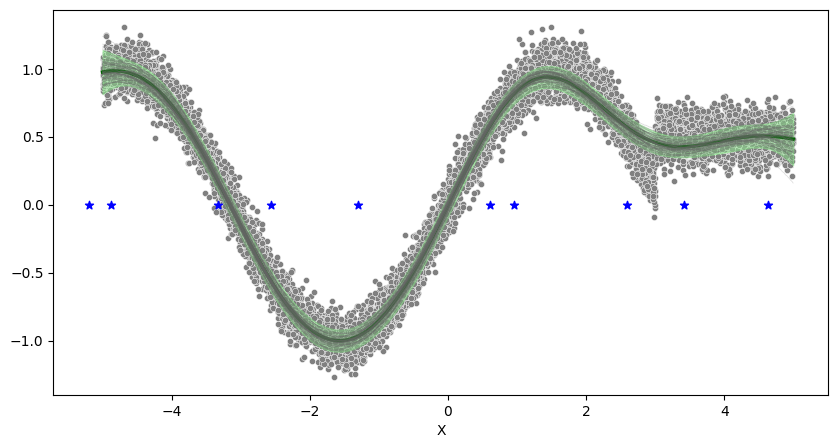

In [21]:
# Now optimize parameters (inclduing inducing points) and plot results
sgp.optimize_params()
sgp.plot_functions(x_idx=0, col_names=['X'])
plt.scatter(
    sgp.inducing_variable.Z, 
    np.zeros_like(sgp.inducing_variable.Z), 
    color='blue', 
    marker='*'
)

## Penalized GP

In [22]:
pgp = model_classes.PenalizedGP(
    X=X,
    Y=Y,
    penalization_factor=10.
)

In [23]:
pgp.optimize_params()
pgp

name,class,transform,prior,trainable,shape,dtype,value
PenalizedGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.21648]
PenalizedGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.00516
PenalizedGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.26852
PenalizedGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.46505
PenalizedGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
PenalizedGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[2.0600e-03...
PenalizedGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[9.8451e-01, 0.0000e+00, 0.0000e+00..."


In [24]:
# Search over penalization factors
pgp.penalization_search()

Penalization search:   0%|          | 0/15 [00:00<?, ?it/s]

Penalization search:   7%|▋         | 1/15 [00:14<03:22, 14.49s/it]

Reached invalid step in optimization, returning previous step.


Penalization search:  60%|██████    | 9/15 [01:04<00:23,  3.99s/it]

Optimization not converged after 5000 rounds


Penalization search:  67%|██████▋   | 10/15 [01:05<00:15,  3.12s/it]

Optimization not converged after 5000 rounds


Penalization search:  73%|███████▎  | 11/15 [01:05<00:09,  2.32s/it]

Optimization not converged after 5000 rounds


Penalization search:  80%|████████  | 12/15 [01:06<00:05,  1.90s/it]

Optimization not converged after 5000 rounds


Penalization search: 100%|██████████| 15/15 [01:24<00:00,  5.61s/it]


Optimization not converged after 5000 rounds


In [25]:
print(f'GP new penalization factor: {pgp.penalization_factor}')
pgp

GP new penalization factor: 1000.0


name,class,transform,prior,trainable,shape,dtype,value
PenalizedGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.25337]
PenalizedGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.24373
PenalizedGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.26163
PenalizedGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.06895
PenalizedGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
PenalizedGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[6.81530e-01...
PenalizedGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[4.6686e-01, 0.0000e+00, 0.0000e+00..."


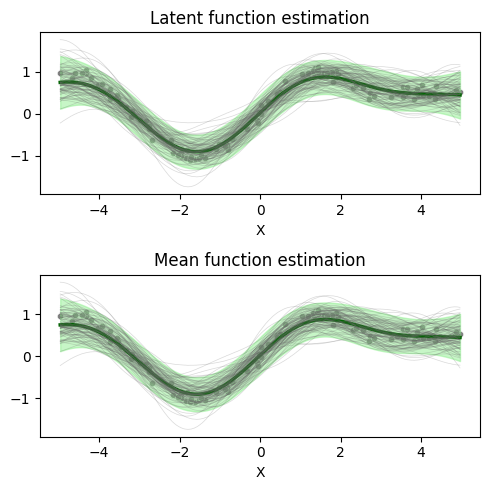

In [26]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
pgp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
pgp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

## Putting it all together

In [27]:
Y_zinb_big = zinb_sample(zinb, X_big, Y_big).astype(float)
psvgp = model_classes.PSVGP(
    X=X_big,
    Y=Y_zinb_big,
    penalized_options={'penalization_factor': 10.},
    sparse_options={'num_inducing_points': 100},
    variational_options={'likelihood': 'zeroinflated_negativebinomial'}
)
psvgp

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.29469]
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,1.0
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.0
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,1.0
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-4.75419...
PSVGP.q_mu,Parameter,Identity,Normal,True,"(100, 1)",float64,[[0....
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,True,"(1, 100, 100)",float64,"[[[1., 0., 0...."


In [28]:
psvgp.optimize_params(num_opt_iter=100)
psvgp

Optimization not converged after 100 rounds


name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.16571]
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.43124
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.29994
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.11241
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,0.44708
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-4.85564...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[-1.33081e+00...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[7.5973e-01, 0.0000e+00, 0.0000e+00..."


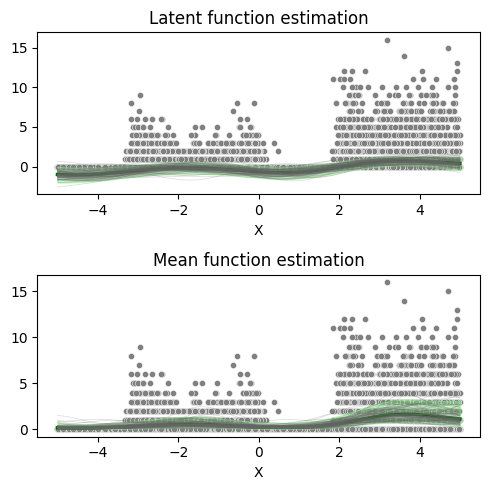

In [29]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
psvgp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
psvgp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

## GP Search Class

In [30]:
# zinb = likelihoods.ZeroInflatedNegativeBinomial()

# def zinb_sample(zinb, X, Y):
#     m = zinb.invlink(Y) #* zinb.scale
#     r = 1. / zinb.alpha
#     np.random.seed(9102)
#     obs_flag = np.random.binomial(n=1, p=(1.0 - (m/ (zinb.km + m))))
#     intensity_val = np.random.negative_binomial(
#         n=r, 
#         p=(r / (m + r))
#     )
#     return obs_flag * intensity_val

# # Y_zinb = zinb._conditional_mean(X, Y).numpy()
# # Y_zinb = likelihoods.ZeroInflatedNegativeBinomial().invlink(Y).numpy()
# Y_zinb = zinb_sample(zinb, X, Y).astype(float)

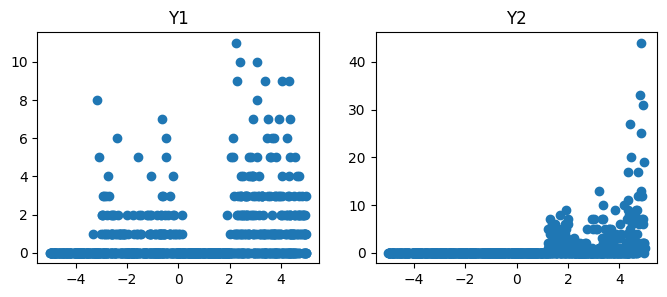

In [31]:
pd_X = pd.DataFrame(
    data=X_big[:1000, :],
    columns=['X']
)
pd_Y = pd.DataFrame(
    data=Y_zinb_big[:1000, :],
    columns=['Y1']
)
pd_Y['Y2'] = zinb_sample(zinb, pd_X['X'], pd_Y['Y1'] + 0.001*pd_X['X'] + 0.5).astype(float)

figs, axs = plt.subplots(1, 2, figsize=(8,3))
axs[0].scatter(pd_X, pd_Y['Y1'])
axs[0].set_title('Y1')
axs[1].scatter(pd_X, pd_Y['Y2'])
axs[1].set_title('Y2')

gps = model_search.GPSearch(
    X=pd_X,
    Y=pd_Y,
    outcome_likelihood='zeroinflated_negativebinomial',
)

In [32]:
gps.run_penalized_search(
    num_jobs=6,
    kernel_options={'kerns': [gpflow.kernels.SquaredExponential(), gpflow.kernels.Matern12()]},
    sparse_options={'num_inducing_points': 100},
    optimization_options={'num_opt_iter': 500},
    search_options={'random_seed': 9102}
)

GPSearch:   0%|          | 0/30 [00:00<?, ?it/s]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:   3%|▎         | 1/30 [03:29<1:41:14, 209.46s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  10%|█         | 3/30 [03:34<21:51, 48.56s/it]

Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  17%|█▋        | 5/30 [03:35<08:52, 21.32s/it]

Optimization not converged after 500 rounds


GPSearch:  20%|██        | 6/30 [03:36<06:11, 15.46s/it]

Optimization not converged after 500 rounds


Optimization not converged after 500 rounds


GPSearch:  23%|██▎       | 7/30 [07:08<27:54, 72.79s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  27%|██▋       | 8/30 [07:11<19:06, 52.13s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  33%|███▎      | 10/30 [07:11<09:30, 28.51s/it]

Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  43%|████▎     | 13/30 [09:28<11:29, 40.56s/it]

Optimization not converged after 500 rounds


GPSearch:  47%|████▋     | 14/30 [09:30<08:28, 31.75s/it]

Optimization not converged after 500 rounds


GPSearch:  50%|█████     | 15/30 [09:30<06:01, 24.09s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


Optimization not converged after 500 rounds


GPSearch:  53%|█████▎    | 16/30 [13:12<17:35, 75.43s/it]

Optimization not converged after 500 rounds


GPSearch:  60%|██████    | 18/30 [13:13<07:58, 39.89s/it]

Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  67%|██████▋   | 20/30 [13:14<03:25, 20.60s/it]

Optimization not converged after 500 rounds


GPSearch:  70%|███████   | 21/30 [13:14<02:11, 14.63s/it]

Optimization not converged after 500 rounds


Optimization not converged after 500 rounds


GPSearch:  73%|███████▎  | 22/30 [16:41<09:30, 71.29s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  77%|███████▋  | 23/30 [16:43<05:55, 50.74s/it]

Optimization not converged after 500 rounds


GPSearch:  80%|████████  | 24/30 [16:44<03:34, 35.73s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  83%|████████▎ | 25/30 [16:45<02:07, 25.48s/it]

Optimization not converged after 500 rounds


GPSearch:  90%|█████████ | 27/30 [16:47<00:39, 13.12s/it]

Optimization not converged after 500 rounds


GPSearch:  93%|█████████▎| 28/30 [18:42<01:26, 43.48s/it]

Optimization not converged after 500 rounds


GPSearch:  97%|█████████▋| 29/30 [18:43<00:30, 30.75s/it]

Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch: 100%|██████████| 30/30 [18:46<00:00, 37.55s/it]


In [33]:
gps.models['Y1']

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-1.80453]
PSVGP.kernel.kernels[0].variance,Parameter,Softplus,Exponential,True,(),float64,0.07443
PSVGP.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,1.7731
PSVGP.kernel.kernels[1].variance,Parameter,Softplus,Exponential,True,(),float64,0.21134
PSVGP.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,0.2521
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.36501
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,0.01386
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-0.23768...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[0.21134...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[8.8675e-01, 0.0000e+00, 0.0000e+00..."


In [34]:
gps.models['Y2']

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-1.80453]
PSVGP.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.11005
PSVGP.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,0.09547
PSVGP.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.73211
PSVGP.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,0.65413
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.60155
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,0.01758
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-3.34613...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[1.54293e+00...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[9.8446e-01, 0.0000e+00, 0.0000e+00..."


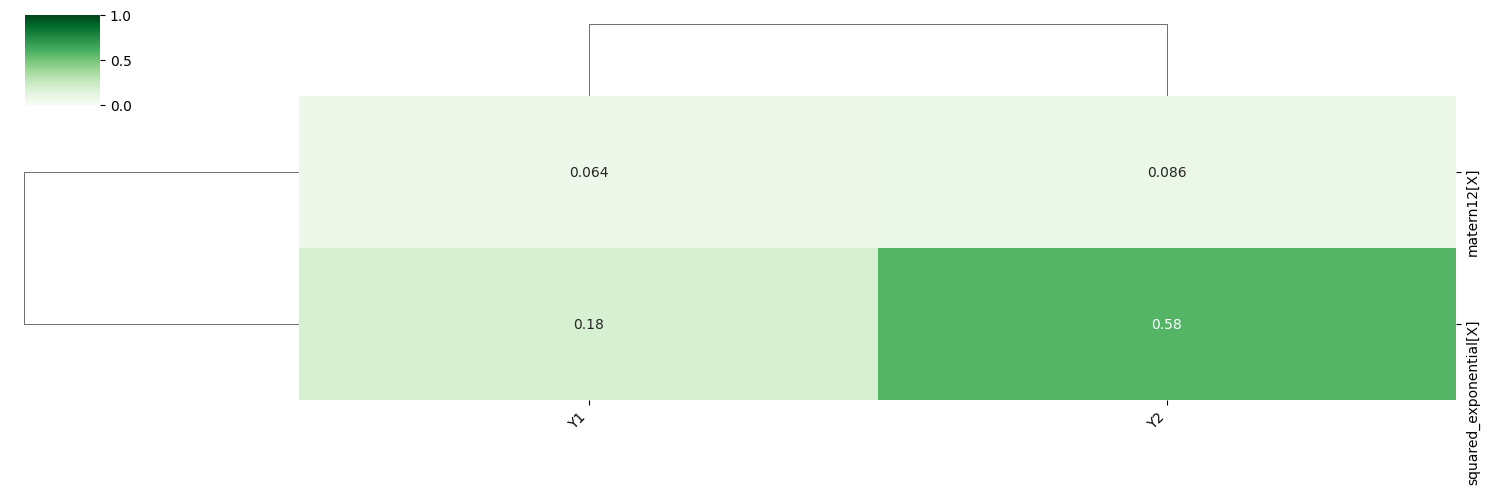

In [35]:
# Something still seems off here with the filtering of values
gps.plot_heatmap(var_cutoff=0)

(<Figure size 2000x500 with 3 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[X] (1.7%)'}, xlabel='X'>,
         <Axes: title={'center': 'matern12[X] (0.1%)'}, xlabel='X'>,
         <Axes: title={'center': 'residuals (98.2%)'}, xlabel='X'>,
         <Axes: >]], dtype=object))

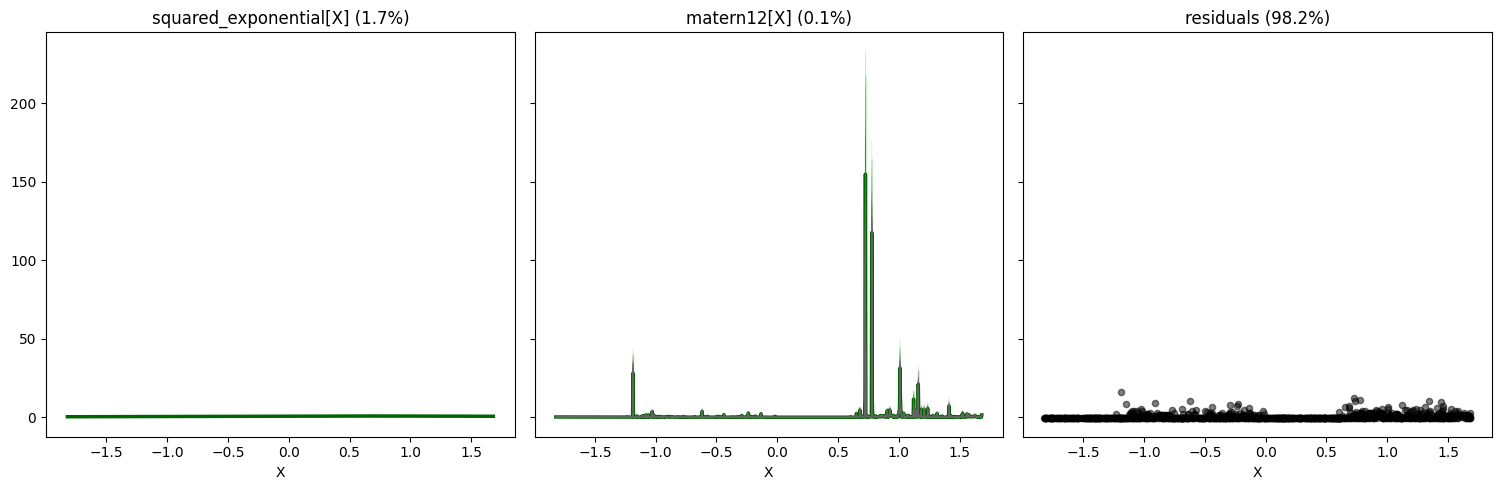

In [36]:
gps.plot_parts(out_label='Y1', x_axis_label='X')#, conf_level_val=0.1)
# plt.yscale('log')
# plt.ylim(-10, 100)

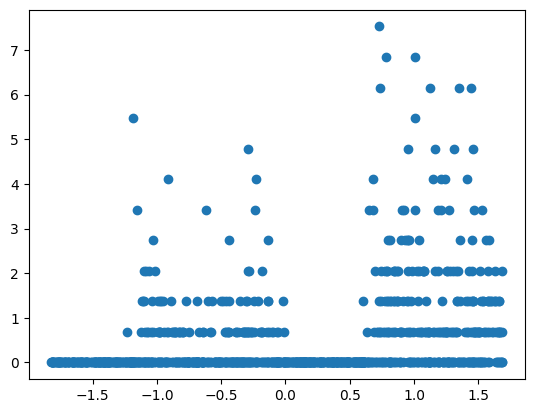

In [37]:
plt.scatter(gps.models['Y1'].X, gps.models['Y1'].Y)

(<Figure size 2000x500 with 3 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[X] (3.0%)'}, xlabel='X'>,
         <Axes: title={'center': 'matern12[X] (17.7%)'}, xlabel='X'>,
         <Axes: title={'center': 'residuals (79.3%)'}, xlabel='X'>,
         <Axes: >]], dtype=object))

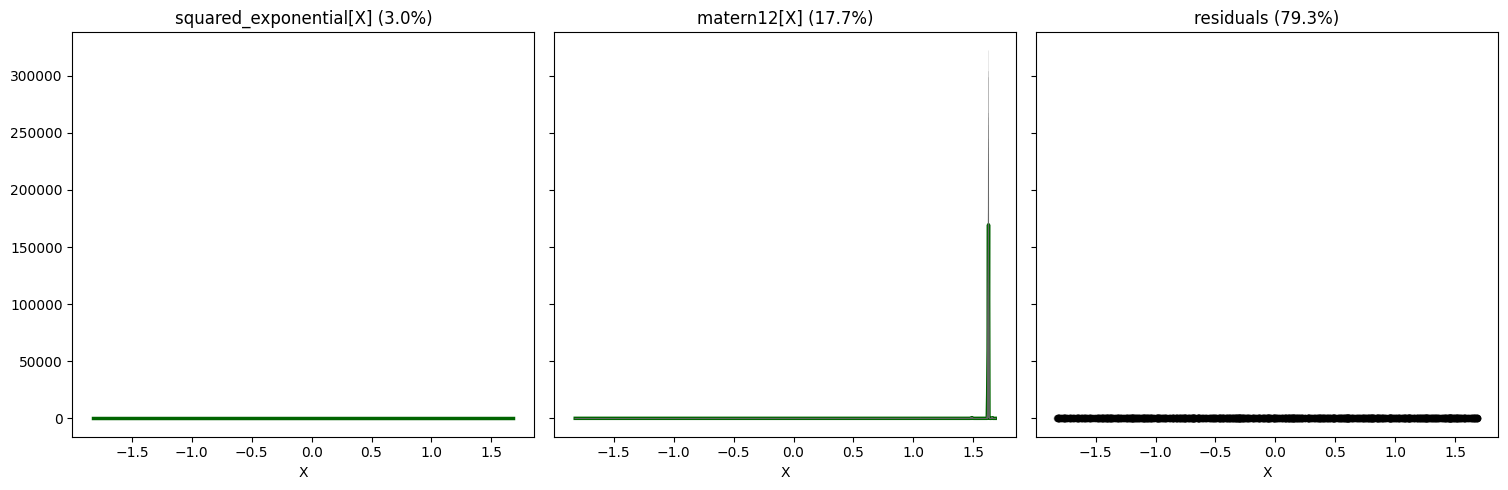

In [38]:
gps.plot_parts(out_label='Y2', x_axis_label='X', conf_level_val=0)
# plt.yscale('log')
# plt.ylim(-10, 100)

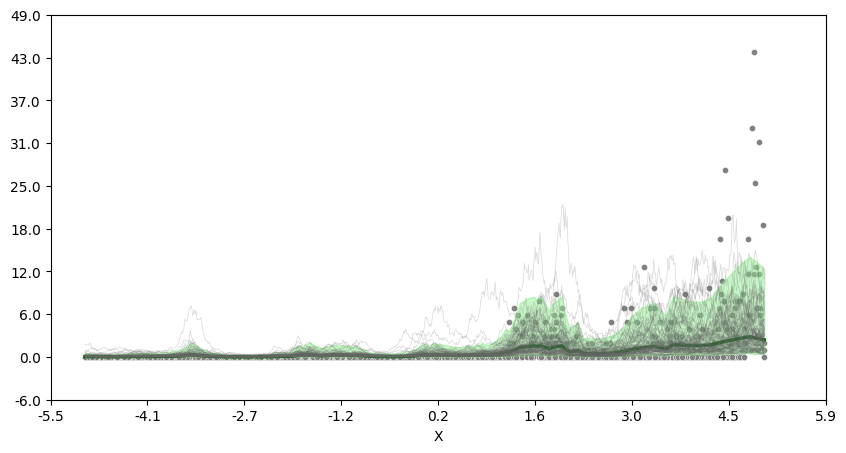

In [39]:
gps.plot_marginal(out_label="Y2", x_axis_label="X", reverse_transform_axes=True)
# # labels = [item.get_text()*gps.X_stds[0] for item in plt.get_xticklabels()]
# # plt.set_xticklabels(labels)

# # x_loc, x_labels = plt.xticks()
# # x_labels = [numeric(x) * gps.X_stds for x in x_labels]
# # plt.xticks(ticks=x_loc, labels=x_labels)
# plt.xticks(
#     ticks=plt.xticks()[0], 
#     labels=np.round(gps.X_stds[0]*np.array(plt.xticks()[0], dtype=np.float64) + gps.X_means[0], 1)
# )

# plt.yticks(
#     ticks=plt.yticks()[0],
#     labels=np.round(gps.Y_stds[0]*np.array(plt.yticks()[0], dtype=np.float64) + gps.Y_means[0], 1)
# )
plt.show()

## Account for multiple time-specific effects

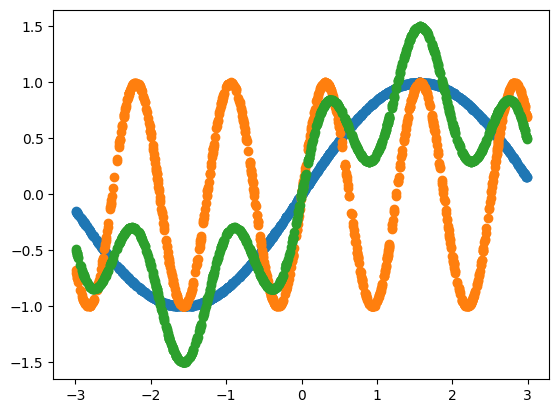

In [5]:
# Multiple time components with different lengthscales
# Libraries
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from waveome import (
    model_classes,
    kernels,
    model_search,
    likelihoods,
    utilities
)


np.random.seed(9102)
n = 1000
x_time = np.random.uniform(low=-3, high=3, size=n)
y_time = np.sin(x_time) 
y_time2 = np.sin(5*x_time)
y_time_out = y_time + 0.5*y_time2

plt.scatter(x_time, y_time)
plt.scatter(x_time, y_time2)
plt.scatter(x_time, y_time_out)

In [6]:
gps_time = model_search.GPSearch(
    X=pd.DataFrame({
        "time": x_time
    }),
    Y=pd.DataFrame({
        "y_mixed": y_time_out
    }),
    outcome_likelihood="gaussian",
)

gps_time.penalized_optimization(optimization_options={'num_opt_iter': 500})

GPOptimize (no search):   0%|          | 0/1 [00:22<?, ?it/s]


In [7]:
gps_time.models["y_mixed"]

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.08864]
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.31359
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.57135
PSVGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.64779
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(500, 1)",float64,[[1.42515e+00...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(500, 1)",float64,[[9.24730e-01...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 500, 500)",float64,"[[[0.68013, 0., 0...."


In [8]:
utilities.calc_rsquare(gps_time.models["y_mixed"])

[0.767, 0.233]

In [10]:
gps_time.models["y_mixed"].kernel

name,class,transform,prior,trainable,shape,dtype,value
SquaredExponential.variance,Parameter,Softplus,Exponential,True,(),float64,0.31359
SquaredExponential.lengthscales,Parameter,Softplus,,True,(),float64,0.57135


(<Figure size 2000x500 with 2 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[time] (76.7%)'}, xlabel='time'>,
         <Axes: title={'center': 'residuals (23.3%)'}, xlabel='time'>,
         <Axes: >, <Axes: >]], dtype=object))

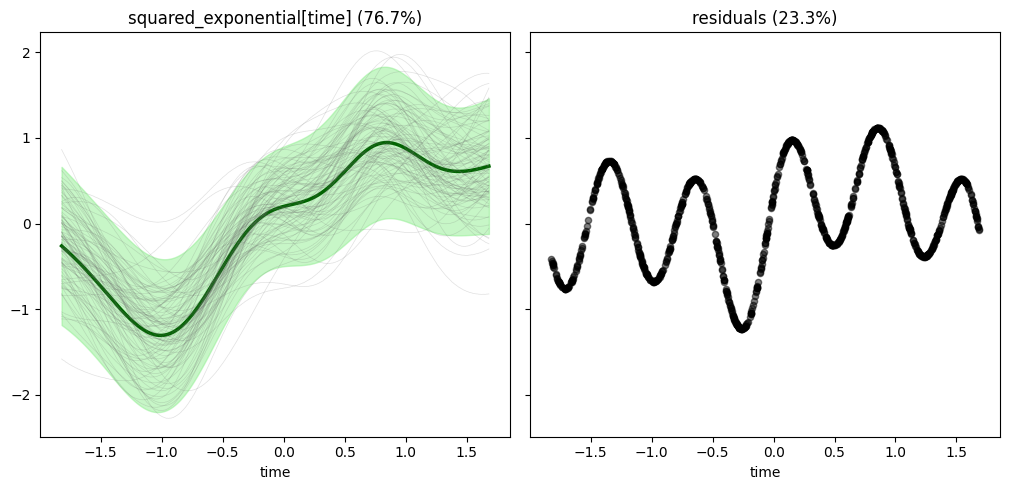

In [11]:
gps_time.plot_parts(out_label="y_mixed", x_axis_label="time")

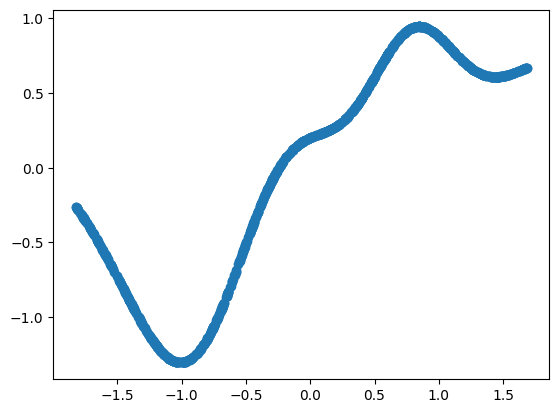

In [12]:
from waveome import utilities

mu_, var_, fns_, covs_ = utilities.individual_kernel_predictions(
    model=gps_time.models["y_mixed"],
    kernel_idx=0,
    X=gps_time.models["y_mixed"].X
)

plt.scatter(
    gps_time.models["y_mixed"].X,
    mu_
)

<Axes: xlabel='time'>

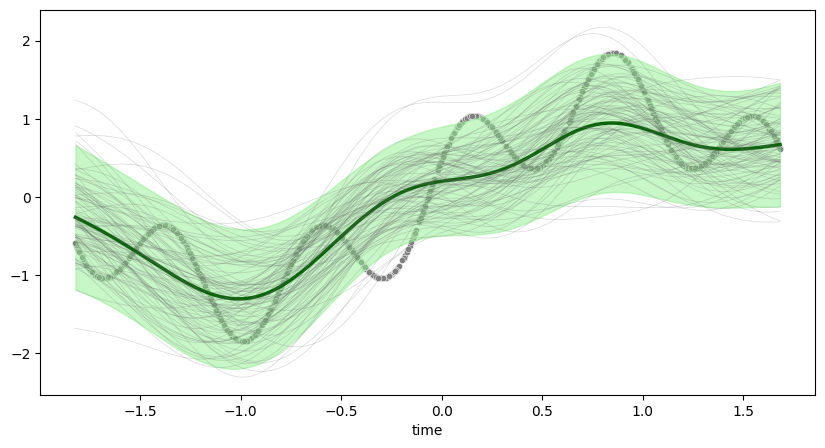

In [13]:
gps_time.plot_marginal(out_label="y_mixed", x_axis_label="time")

In [21]:
# Now add two time columns
gps_time2 = model_search.GPSearch(
    X=pd.DataFrame({
        "time1": x_time,
        "time2": x_time
    }),
    Y=pd.DataFrame({
        "y_mixed": y_time_out
    }),
    outcome_likelihood="gaussian"
)

gps_time2.penalized_optimization(
    random_seed=9102,
    num_random_restarts=5,
    kernel_options={
        "second_order_numeric": False,
        "kerns": [
            gpflow.kernels.SquaredExponential(), 
            gpflow.kernels.Periodic(base_kernel=gpflow.kernels.SquaredExponential())
        ]
    }
)

GPOptimize (no search):   0%|          | 0/1 [00:57<?, ?it/s]


(<Figure size 2000x1000 with 5 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[time1] (29.8%)'}, xlabel='time1'>,
         <Axes: title={'center': 'periodic[time1] (23.0%)'}, xlabel='time1'>,
         <Axes: title={'center': 'squared_exponential[time2] (22.0%)'}, xlabel='time2'>,
         <Axes: title={'center': 'periodic[time2] (24.6%)'}, xlabel='time2'>],
        [<Axes: title={'center': 'residuals (0.6%)'}, xlabel='time1'>,
         <Axes: >, <Axes: >, <Axes: >]], dtype=object))

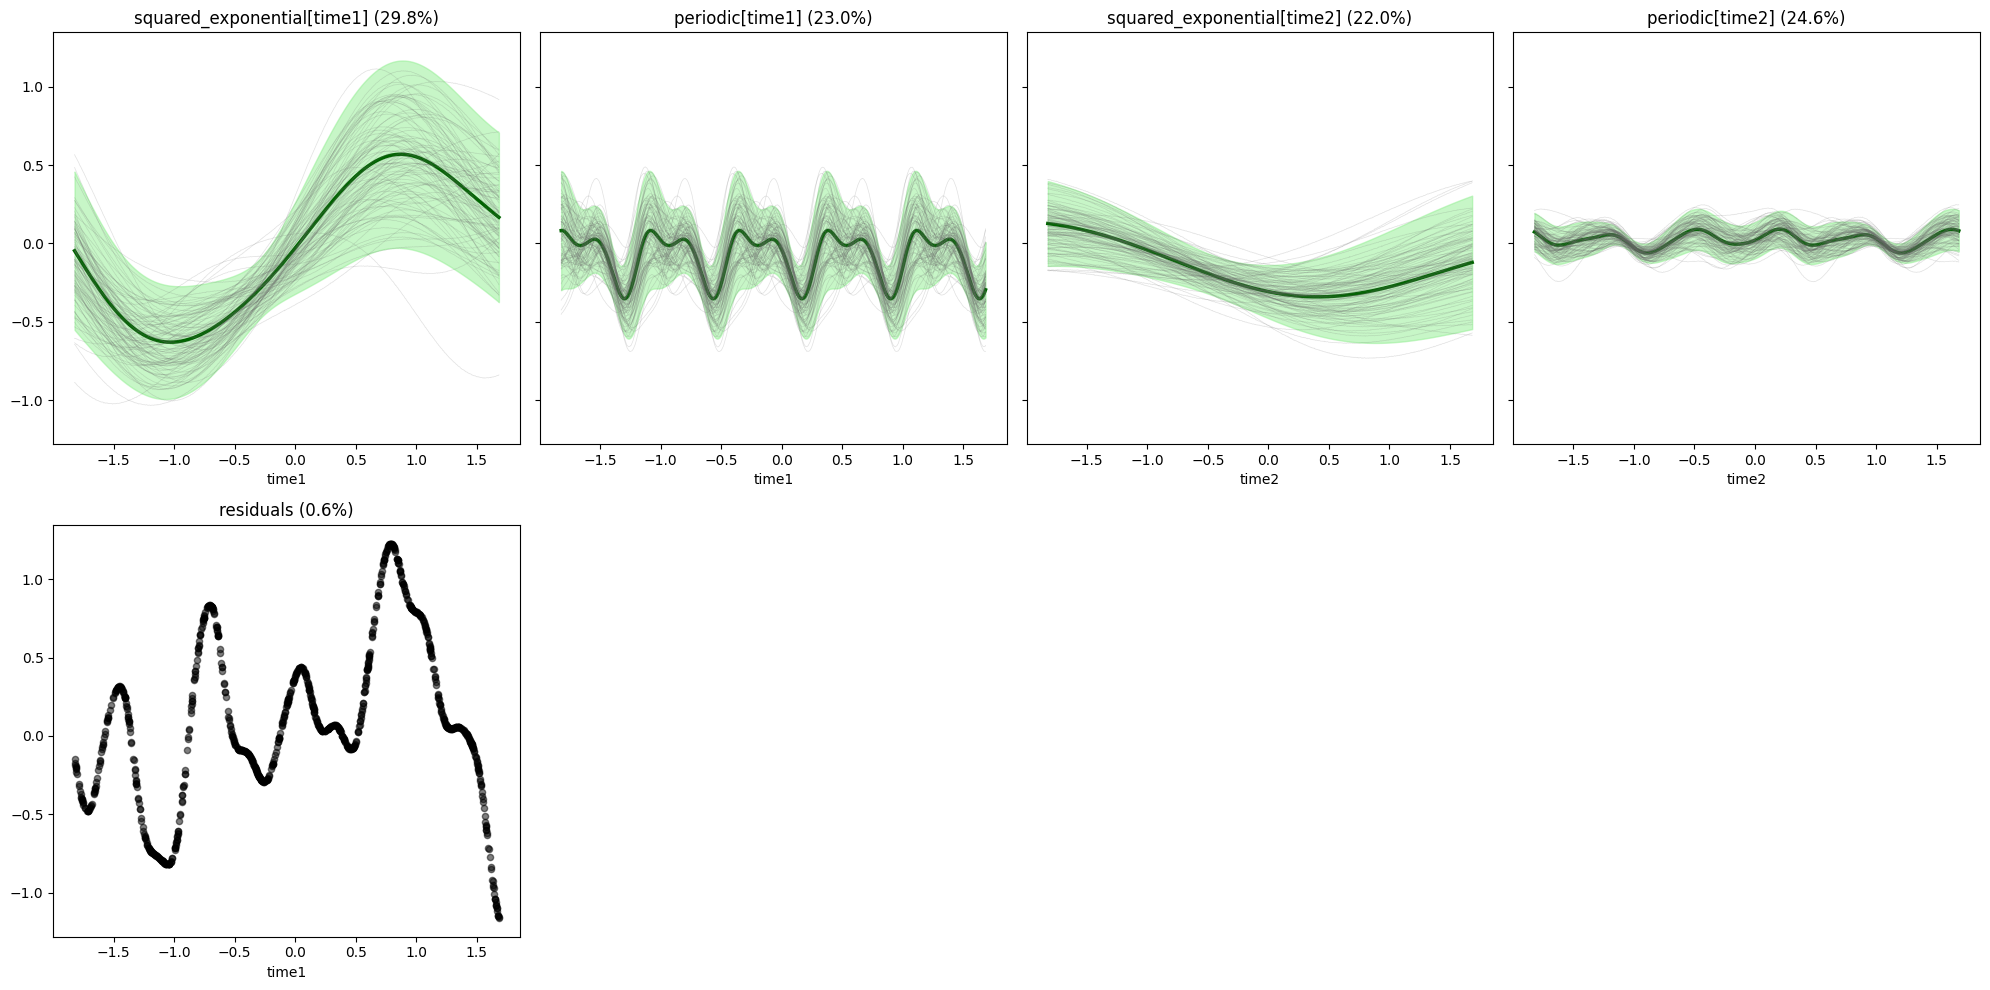

In [22]:
gps_time2.plot_parts(out_label="y_mixed", x_axis_label="time1")